<a href="https://colab.research.google.com/github/rishita2002/Google-Colaboratories/blob/main/arcee_DALM_BasicTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jan 15 08:17:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/arcee-ai/DALM

Cloning into 'DALM'...
remote: Enumerating objects: 1794, done.
remote: Counting objects: 100% (415/415), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 1794 (delta 288), reused 326 (delta 262), pack-reused 1379
Receiving objects: 100% (1794/1794), 19.41 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (1062/1062), done.


In [ ]:
!pip install hatchling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
%cd DALM
!pip install --upgrade -e .

/content/DALM
Obtaining file:///content/DALM
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  error: subprocess-exited-with-error
  
  × Preparing editable metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing editable metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install -qqq indomain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


In [ ]:
!dalm version

2024-01-15 08:18:44.596115: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 08:18:44.596175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 08:18:44.598178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 08:18:47.183066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
🐾You are running DALM version: 0.0.5


In [ ]:
#let's take a look at our toy_data
%cat ./dalm/datasets/toy_data_train.csv

Question,Abstract,Answer
Photosynthesis definition,Process where plants convert light into energy through chlorophyll.,Energy conversion in plants
Author of "Romeo and Juliet",Famous play written by William Shakespeare.,William Shakespeare
Capital of France,The capital city of France is Paris.,Paris
Declaration of Independence date,"Document signed on July 4, 1776 declaring American independence.,July 4", 1776
World's largest ocean,The Pacific Ocean is the largest and deepest ocean on Earth.,Pacific Ocean
Inventor of the telephone,Alexander Graham Bell invented the first practical telephone.,Alexander Graham Bell
Natural satellite of Earth,The Moon is Earth's only natural satellite.,Moon
Element with symbol "H",Hydrogen is a chemical element with the symbol H.,Hydrogen
Novel "Pride and Prejudice" "author,Classic novel written by Jane Austen.",Jane Austen
Human body's powerhouse,Mitochondria are the powerhouse of the cell.,Mitochondria
Light's speed,"The speed of light in a vacuum is ab

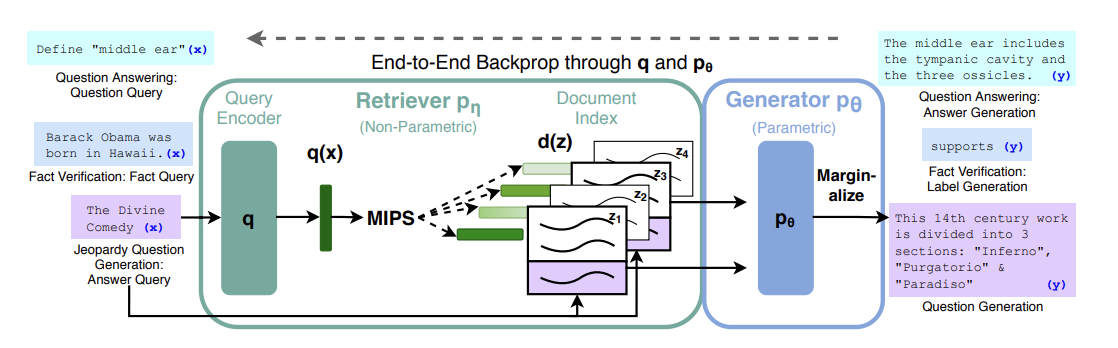

### HNSW - Hierarchial Navigable Small World - Used for encoding the passages and query and then determines similarity using either ip, squared l2, cosine to find nearest neighbour.

# Train DALM model with gpt-neo-125m generator and bge-large-en retriever together
Train a small 125 million parameters GPT Neo model and we will train the small bge retriever model (Embedding Model- FlagEmbedding can map any text to a low-dimensional dense vector)

For better results, substitute meta-llama/Llama-2-7b and bge-large-en. **You will need a bigger GPU (like A100-80GB) to train this** - and make sure to adjust batch size to saturate your GPU memory

In [ ]:
!dalm train-rag-e2e \
"./dalm/datasets/toy_data_train.csv" \
"BAAI/bge-large-en" \
"EleutherAI/gpt-neo-125m" \
--output-dir "./dalm/training/rag_e2e/rag_e2e_checkpoints" \
--with-tracking \
--report-to all \
--per-device-train-batch-size 1

2024-01-15 08:18:54.455111: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 08:18:54.455179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 08:18:54.457010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 08:18:55.794378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
config.json: 100% 720/720 [00:00<00:00, 3.82MB/s]
model.safetensors: 100% 1.34G/1.34G [00:11<00:00, 115MB/s]
tokenizer_config.json: 100% 366/366 [00:00<00:00, 1.50MB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 11.9MB/s]
tokenizer.json: 100% 7

# Evaluate Retriever Training
Evalauate the contextualized retriever against the passage data that we will have in our database at retrieval time

The Retriever in general is trained to be good at finding the most relevant passages in a corpus given a query. (Example situation - **DALM-Patent** on arcee.ai)

1) Given a ground-truth test dataset that is a 200,000-line CSV containing patent abstracts and more importantly this evaluation dataset was not present in the training dataset.

2) Use the trained retriever to encode all passages into an ad-hoc indexed vector store using the **HNSW library**.

3) Take each query and use the trained retriever to encode it into an embedding vector (QE)

4) For each encoded passage (PE) in the vector store, find the nearest neighbor similarity search score between QE and PE (Note: with HNSW, exhaustiveness is avoided)

5) Find the top-K (eg, top 5) best matches based on nearest neighbor similarity search scores

6)Compare the matches against the ground truth top-K best matches to calculate recall and hit rate.

In [ ]:
#must login to HF for this eval
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Error while evaluation of Retriever-Generator Pair

RepositoryNotFoundError: 404 Client Error. (Request ID:
Root=1-65a3f9e9-71cce19a1629b53f48841a14;f574d764-ba35-4c08-b242-f49913794d93)

Repository Not Found for url:
https://huggingface.co/rag_e2e_checkpoints/retriever/resolve/main/adapter_config.json.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.

ValueError: Can't find 'adapter_config.json' at 'rag_e2e_checkpoints/retriever'

In [ ]:
!dalm eval-rag "./dalm/datasets/toy_data_train.csv" \
 --retriever-name-or-path "BAAI/bge-large-en" \
 --generator-name-or-path "EleutherAI/gpt-neo-125m" \
 --retriever-peft-model-path rag_e2e_checkpoints/retriever \
 --generator-peft-model-path rag_e2e_checkpoints/generator \
 --passage-column-name Abstract \
 --query-column-name Question \
 --answer-column-name Answer \
 --query-batch-size 5

2024-01-15 08:30:48.061986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 08:30:48.062043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 08:30:48.063358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 08:30:49.225604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tokenizer on dataset (num_proc=4): 100% 19/19 [00:00<00:00, 36.13 examples/s]
╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/huggingface_